In [78]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px



In [21]:
df = pd.read_csv('startup_funding.csv', encoding='utf-8')

df.head

<bound method NDFrame.head of       Sr No Date dd/mm/yyyy                  Startup Name    Industry Vertical                            SubVertical City  Location                     Investors Name       InvestmentnType Amount in USD                            Remarks
0         1      09/01/2020                        BYJU’S               E-Tech                             E-learning      Bengaluru            Tiger Global Management  Private Equity Round  20,00,00,000                                NaN
1         2      13/01/2020                        Shuttl       Transportation              App based shuttle service        Gurgaon          Susquehanna Growth Equity              Series C     80,48,394                                NaN
2         3      09/01/2020                     Mamaearth           E-commerce  Retailer of baby and toddler products      Bengaluru              Sequoia Capital India              Series B   1,83,58,860                                NaN
3         4   

In [22]:
print("shape:", df.shape)
print("\nColumns:",df.columns)

shape: (3044, 10)

Columns: Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')


In [23]:
#series or frame 
df.dtypes

Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object

In [24]:

#Checking nulls
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [25]:
#Quick stats
df.describe(include="all")

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
count,3044.000000,3044,3044,2873,2108,2864,3020,3040,2084,419
unique,NaN,1035,2459,821,1942,112,2412,55,471,72
top,NaN,02/02/2015,Ola Cabs,Consumer Internet,Online Lending Platform,Bangalore,Undisclosed Investors,Private Equity,"10,00,000",Series A
freq,NaN,11,8,941,11,700,39,1356,165,175
mean,1522.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,878.871435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,761.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1522.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2283.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Remove whitespace for simplicity 
df.rename(columns={
    'InvestmentnType': 'FundingType',
    'Amount in USD': 'Amount',
    'City  Location': 'City',
    'Investors Name': 'Investors',
    'Startup Name': 'Startup',
    'Date dd/mm/yyyy': "Date"  
}, inplace=True)

C:\Users\ayans\AppData\Local\Temp\ipykernel_8608\1519695924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [34]:
df.describe(include="all")

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
count,3044.000000,3044,3044,2873,2108,2864,3020,3040,2084,419
unique,NaN,1035,2459,821,1942,112,2412,55,471,72
top,NaN,02/02/2015,Ola Cabs,Consumer Internet,Online Lending Platform,Bangalore,Undisclosed Investors,Private Equity,"10,00,000",Series A
freq,NaN,11,8,941,11,700,39,1356,165,175
mean,1522.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,878.871435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,761.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1522.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2283.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Remove unnecessary whitespace
df['City'] = df['City'].str.strip()
df['Startup'] = df['Startup'].str.strip()

In [39]:
#Normalise City names

df['City'] = df['City'].replace({
    'Delhi': 'New Delhi',
    'Bangalore': 'Bengaluru',
    'Mumbai': 'Mumbai',
    'Noida': 'Noida',
    'Gurgaon': 'Gurugram',
    'Hyderabad': 'Hyderabad'

})

In [47]:
# First, remove commas and extra symbols
df['Amount'] = df['Amount'].str.replace(',','').str.replace('$','')



In [49]:
#Remove non-numeric entries (like 'undisclosed','unknown')
df = df[df['Amount'].str.lower().str.replace(' ','').str.isnumeric() == True]

In [50]:
#Convert Amount column to float

df['Amount'] = df['Amount'].replace('[\$]','',regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ayans\AppData\Local\Temp\ipykernel_8608\3000145489.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Amount'] = df['Amount'].replace('[\$]','',regex=True).astype(float)
C:\Users\ayans\AppData\Local\Temp\ipykernel_8608\3000145489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df['Amount'].replace('[\$]','',regex=True).astype(float)


In [52]:
#Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

C:\Users\ayans\AppData\Local\Temp\ipykernel_8608\1389975705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [57]:
#Lets find out which city have the highest funding

top__cities = df['City'].value_counts().head(10)
top__cities


City
Bengaluru    581
Mumbai       401
New Delhi    266
Gurugram     240
Chennai       75
Hyderabad     72
Pune          71
Noida         55
Ahmedabad     27
Jaipur        14
Name: count, dtype: int64

C:\Users\ayans\AppData\Local\Temp\ipykernel_8608\2789317331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top__cities,y=top__cities.index, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

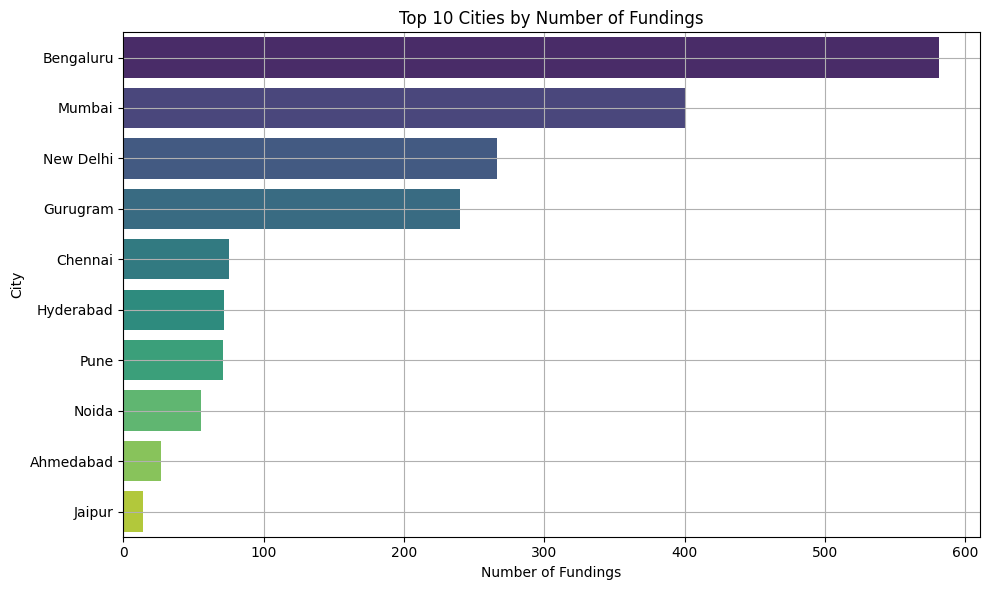

In [56]:
#Top startups By Total Funding
plt.figure(figsize=(10,6))
sns.barplot(x=top__cities,y=top__cities.index, palette='viridis')
plt.title('Top 10 Cities by Number of Fundings')
plt.xlabel('Number of Fundings')
plt.ylabel('City')
plt.grid(True)
plt.tight_layout()
plt.show

C:\Users\ayans\AppData\Local\Temp\ipykernel_8608\837589729.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_startups.values,y=top_startups.index,palette='mako')


<function matplotlib.pyplot.show(close=None, block=None)>

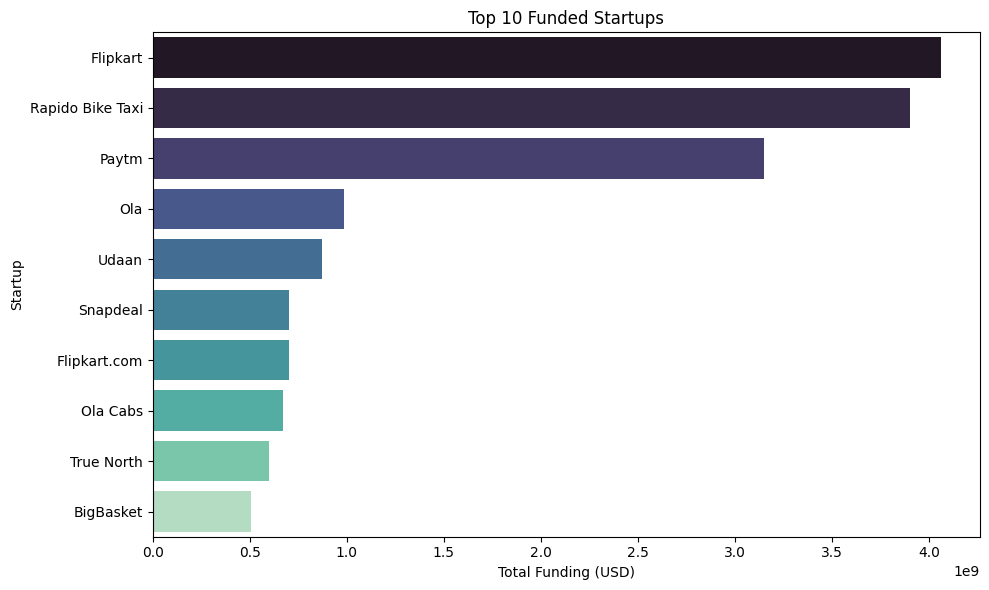

In [58]:
# Top 10 Startups by Total Fundings
top_startups = df.groupby('Startup')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_startups.values,y=top_startups.index,palette='mako')
plt.title('Top 10 Funded Startups')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Startup')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

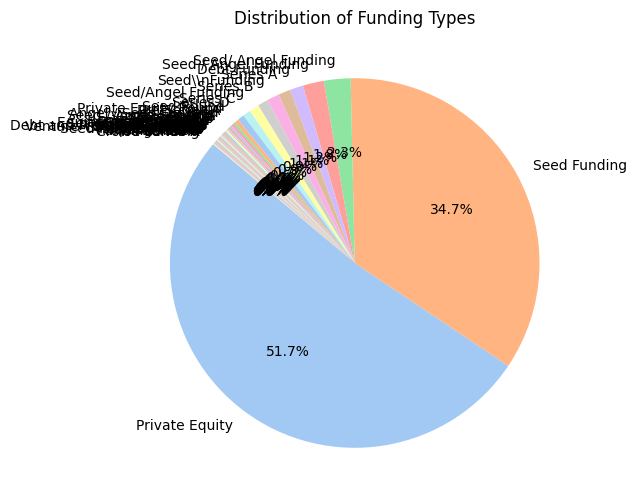

In [69]:
# Most common Funding Types

funding_types = df['FundingType'].value_counts()

plt.figure(figsize=(10,6))
funding_types.plot(kind='pie',autopct='%1.1f%%', startangle = 140, colors= sns.color_palette('pastel'))
plt.title('Distribution of Funding Types')
plt.ylabel('')
plt.show

C:\Users\ayans\AppData\Local\Temp\ipykernel_8608\2993588596.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(count),y=list(investors),palette='coolwarm')


<function matplotlib.pyplot.show(close=None, block=None)>

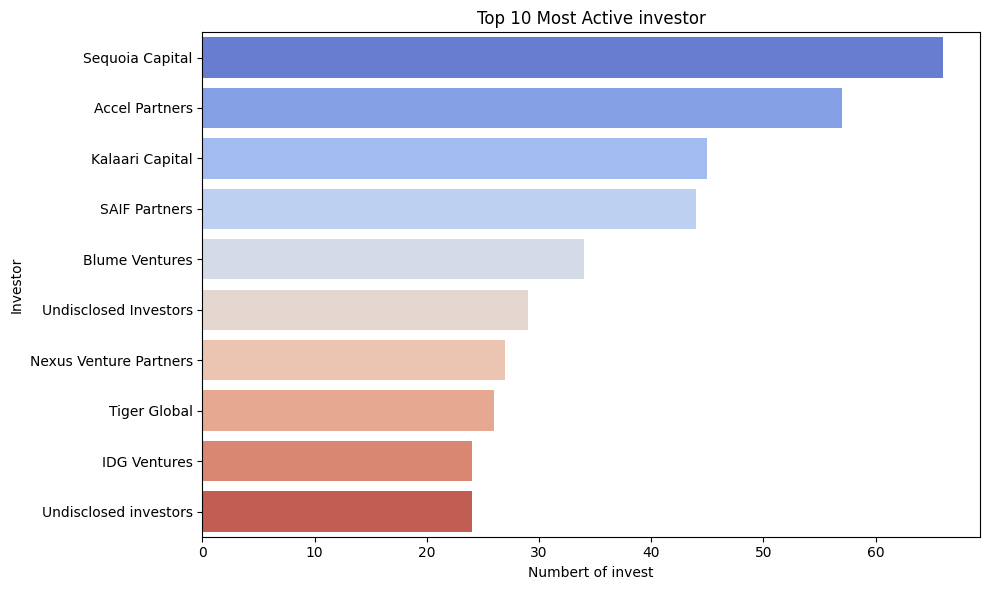

In [72]:
# Top 10 Most Active Investor 

## Split multiple investor and flatten the list 

investor_series = df['Investors'].dropna().str.split(', ')
flat_investor = [investor.strip() for sublist in investor_series for investor in sublist]
top_investors = Counter(flat_investor).most_common(10)

#Plot

investors, count = zip(*top_investors)
plt.figure(figsize=(10,6))
sns.barplot(x=list(count),y=list(investors),palette='coolwarm')
plt.title('Top 10 Most Active investor')
plt.xlabel('Numbert of invest')
plt.ylabel('Investor')
plt.tight_layout()
plt.show

C:\Users\ayans\AppData\Local\Temp\ipykernel_8608\4226583183.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\ayans\AppData\Local\Temp\ipykernel_8608\4226583183.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']= df['Date'].dt.year


<function matplotlib.pyplot.show(close=None, block=None)>

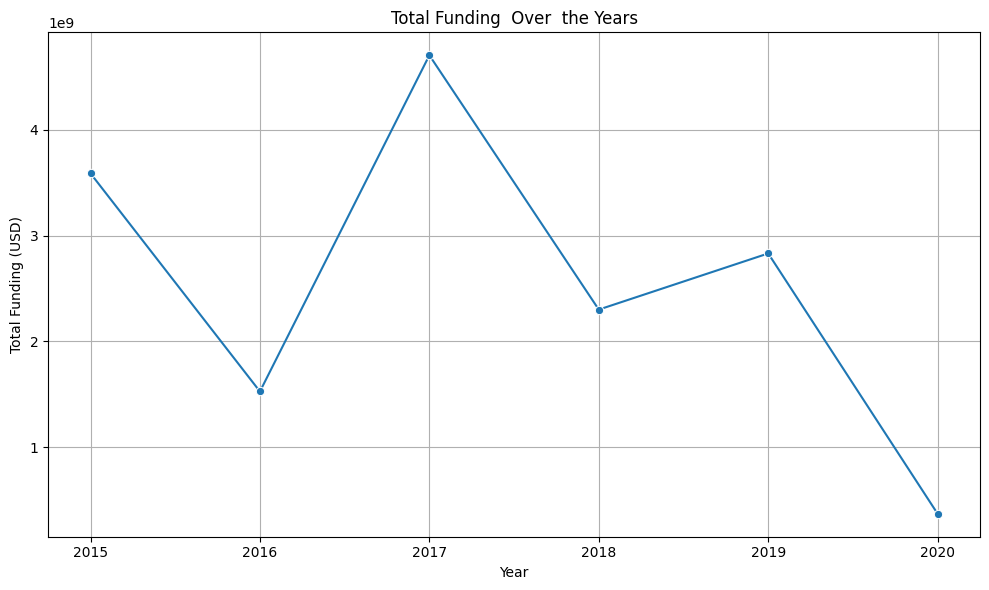

In [77]:
# Funding Trend over The Years

## Ensure Date column is in datetime format

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year']= df['Date'].dt.year

funding_by_year = df.groupby('Year')['Amount'].sum()
plt.figure(figsize= (10,6))
sns.lineplot(x=funding_by_year.index, y=funding_by_year.values, marker= 'o')
plt.title('Total Funding  Over  the Years')
plt.xlabel ('Year')
plt.ylabel('Total Funding (USD)')
plt.grid(True)
plt.tight_layout()
plt.show